In [1]:
import numpy as np
import pandas as pd
# !pip install plotly
# !pip install cufflinks
# !pip install nltk
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%config Completer.use_jedi = False

import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
from xgboost import XGBClassifier

In [12]:
import zipfile


In [13]:
zf = zipfile.ZipFile('./Dataset/consumer_complaints.csv.zip')
df = pd.read_csv(zf.open('consumer_complaints.csv'))
# df=pd.read_csv('../Consumer_Complaint/Dataset/complaints.csv')
# df.shape

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [14]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935317 entries, 0 to 1935316
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 265.

In [72]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    621100
Debt collection                                                                 331226
Mortgage                                                                        318443
Credit reporting                                                                140432
Credit card or prepaid card                                                     100076
Credit card                                                                      89190
Bank account or service                                                          86206
Checking or savings account                                                      80518
Student loan                                                                     60344
Consumer Loan                                                                    31604
Money transfer, virtual currency, or money service                               22252
Vehicle loan or lease                      

In [73]:
df['Product'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Number complaints in each product')


In [74]:
pd.notnull(df['Consumer complaint narrative']).value_counts()

False    1278216
True      657101
Name: Consumer complaint narrative, dtype: int64

In [ ]:
df['Product']

In [75]:
Data = df[['Product','Consumer complaint narrative']]
Data = Data[pd.notnull(Data['Consumer complaint narrative'])]
Data

,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,Debt collection,Pioneer has committed several federal violatio...
8,"Credit reporting, credit repair services, or o...","Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/..."
9,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
...,...,...
1935312,Debt collection,I recieved a collections call from an unknown ...
1935313,Mortgage,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who..."
1935314,Credit card,I made a payment to CITI XXXX Credit Card on X...
1935315,Credit reporting,cfbp i would Like to file a complaint on Exper...


In [76]:
Data.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'},inplace=True)

Data.groupby('Product').Consumer_complaint_narrative.count()


Product
Bank account or service                                                          14885
Checking or savings account                                                      27958
Consumer Loan                                                                     9473
Credit card                                                                      18838
Credit card or prepaid card                                                      48195
Credit reporting                                                                 31588
Credit reporting, credit repair services, or other personal consumer reports    236607
Debt collection                                                                 131102
Money transfer, virtual currency, or money service                               12316
Money transfers                                                                   1497
Mortgage                                                                         73222
Other financial service            

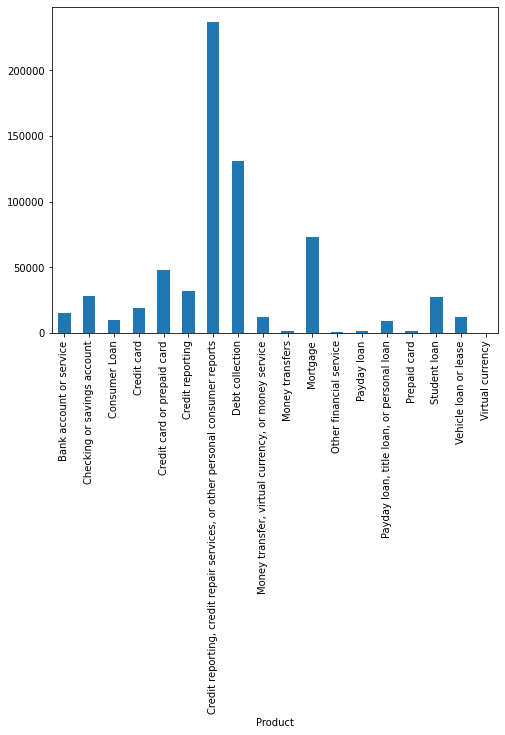

In [77]:
fig = plt.figure(figsize=(8,6))
Data.groupby('Product').Consumer_complaint_narrative.count().plot.bar()
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='Product',data=Data)

In [78]:
# Data['Consumer_complaint_narrative']=Data['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [79]:
Data['Consumer_complaint_narrative'].sample(2)

806747    IN REGARDS TO : SANTANDER CONSUMER USA XXXX XX...
765296    I have called several times over the past 2 ye...
Name: Consumer_complaint_narrative, dtype: object

In [136]:
import re
import nltk 
# nltk.download('stopwords')
from nltk.corpus import stopwords
Stopwords=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 


In [102]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[-()\"#/@;:<>{}=~|.?,]', " ", text)
    text = ' '.join(word for word in text.split() if word not in Stopwords)
    
    return text

In [103]:
type(df['Consumer complaint narrative'])

pandas.core.series.Series

In [104]:
Data['Consumer_complaint_narrative']=Data['Consumer_complaint_narrative'].astype(str).apply(clean_text)
Data['Consumer_complaint_narrative'] =Data['Consumer_complaint_narrative'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

<AxesSubplot:xlabel='Product', ylabel='count'>

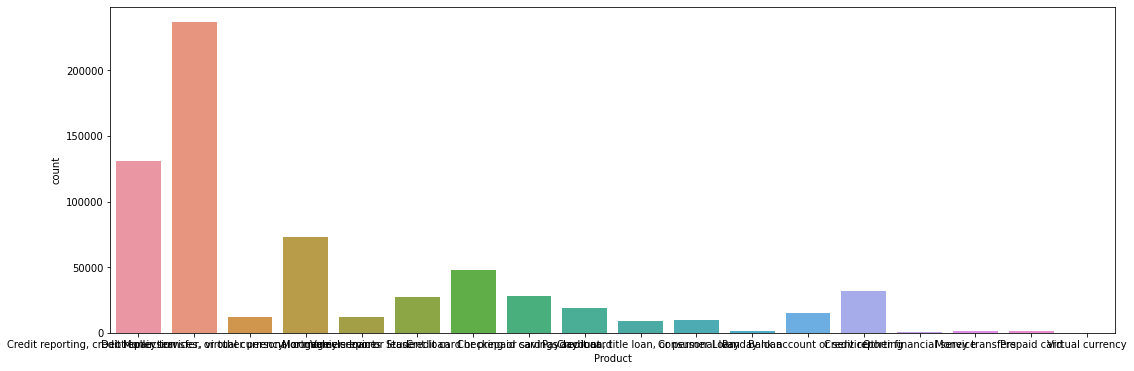

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [107]:
import torch
import torch.nn as nn

In [171]:
train_x, valid_x, train_y, valid_y = train_test_split(Data['Consumer_complaint_narrative'], Data['Product'],stratify=Data['Product'], 
                                                    test_size=0.25)

In [138]:
train_x
# nn.Embedding()

360630     previously disputed bankruptcy response verifi...
63143      came attention there incorrect information acc...
502713     received credit report three major credit repo...
197901     family held approved fha loan xxxx credit repo...
1663158    dear sir madam 've sent money $820 00 xxxx xxx...
                                 ...                        
705424     ordered pc xxxx pc severely damaged also came ...
557708     multiple medical debt credit score xx xx xxxxa...
1652763    xxxx payment xxxx never credited account calle...
266863     checked credit report saw account xxxx opploan...
1692352    modification loan granted xxxx citimortgage un...
Name: Consumer_complaint_narrative, Length: 492825, dtype: object

In [144]:
########TFIDF#############
tfidf=TfidfVectorizer()
tfidf.fit(Data['Consumer_complaint_narrative'])
xtrain_tfidf=tfidf.transform(train_x)
ytrain_tfidf=tfidf.transform(train_y)

In [178]:
print(ytrain_tfidf.shape)

(492825, 141086)


In [161]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


In [184]:
# # clf=XGBClassifier()
# xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
# xgb_model.fit(xtrain_tfidf, train_y)
# model=LGBMClassifier()

In [166]:

# # lightgbm
# param_grid = {
#     'n_estimators': [400, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'num_leaves': [50, 100, 200],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'min_split_gain': [0.3, 0.4],
#     'subsample': [0.7, 0.8, 0.9],
#     'subsample_freq': [20]
# }
# !pip install lightgbm

In [ ]:
#### Deep Learning Model

In [29]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torchtext import data    
from torchtext.vocab import Vectors
import spacy
# !python -m spacy download en
# !python -m spacy download en_core_web_sm
# import en_core_web_sm
# spacy.load('en_core_web_sm')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
word2vec = {}
with open('glove/glove.6B.200d.txt',encoding='utf-8') as vec_file:
    for line in vec_file:
        values=line.split()
#         print(values)
        words=values[0]
        vec = np.asarray(values[1:], dtype='float32') 
        word2vec[words]=vec
    print('Found %s word vectors.' % len(word2vec))
        

Found 400000 word vectors.


In [30]:
####model creation
def model()